In [1]:
DATA_PATH = '../data/cifar-10-batches-py/'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
unpickle(DATA_PATH + "data_batch_1")

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

## EXTRACTION DE FEATURES HOG

In [3]:
import numpy as np
from skimage.feature import hog

def extract_hog_features(data):
    hog_features = []

    for img in data:
        # Reshape the image
        img_reshaped = np.reshape(img, (32, 32, 3))

        # Initialize a list to store the hog features of each channel
        hog_features_img = []

        for channel in range(img_reshaped.shape[2]):
            # Extract HOG features from the current channel
            feature = hog(img_reshaped[:, :, channel], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

            # Append the HOG features of the current channel to hog_features_img
            hog_features_img.append(feature)

        # Concatenate the HOG features of each channel and append them to hog_features
        hog_features.append(np.concatenate(hog_features_img))

    return np.array(hog_features)

data_dict = unpickle(DATA_PATH + "data_batch_1")

meta = unpickle(DATA_PATH + 'batches.meta')

images = data_dict[b"data"]

hog_features = extract_hog_features(images)


In [4]:
hog_features

array([[0.22531424, 0.22052946, 0.24048989, ..., 0.1690073 , 0.11528662,
        0.06274257],
       [0.17634939, 0.03514505, 0.12870185, ..., 0.14132616, 0.15223541,
        0.14205324],
       [0.18963947, 0.08224693, 0.10763309, ..., 0.18289543, 0.06552798,
        0.07313401],
       ...,
       [0.24431185, 0.08192494, 0.28025497, ..., 0.09554489, 0.02261936,
        0.01927484],
       [0.25746323, 0.        , 0.12434521, ..., 0.19880189, 0.04682241,
        0.26168929],
       [0.26616573, 0.05860713, 0.02974684, ..., 0.14932474, 0.19096086,
        0.0776746 ]])

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

labels = data_dict[b"labels"]

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.467625
Test accuracy: 0.3315


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred = model.predict(X_test)

def plot_images(images, true_labels, pred_labels, k):
    plt.figure(figsize=(10,10))
    indices = np.random.choice(range(len(images)), k)
    for i, idx in enumerate(indices):
        plt.subplot(k//2, 2, i+1)
        img = np.reshape(images[idx], (32, 32, 3))
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_names[true_labels[idx]]}, Pred: {class_names[pred_labels[idx]]}")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


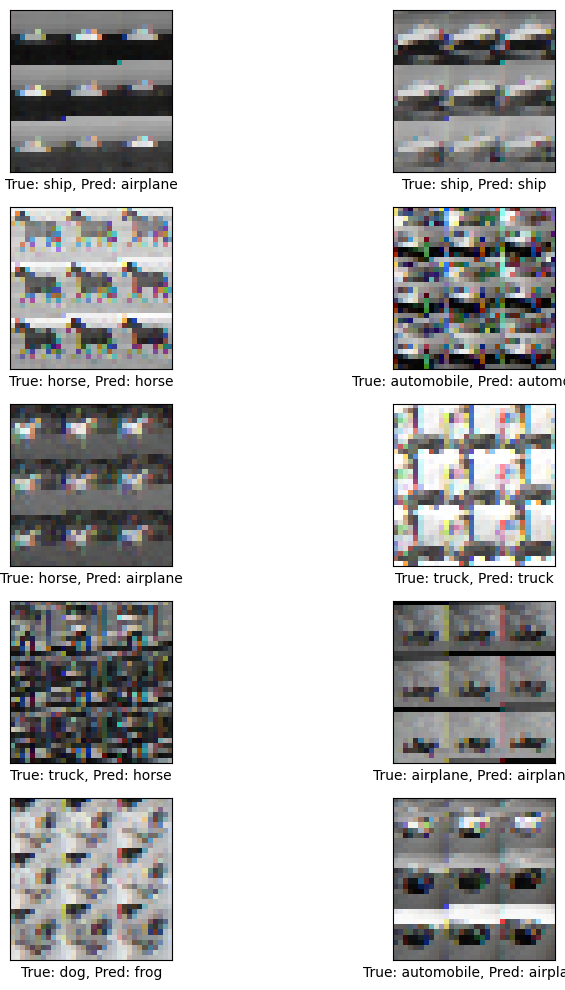

In [7]:
X_train_images, X_test_images, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train_hog = extract_hog_features(X_train_images)
X_test_hog = extract_hog_features(X_test_images)

model = LogisticRegression()
model.fit(X_train_hog, y_train)

y_pred = model.predict(X_test_hog)

plot_images(X_test_images, y_test, y_pred, k=10)


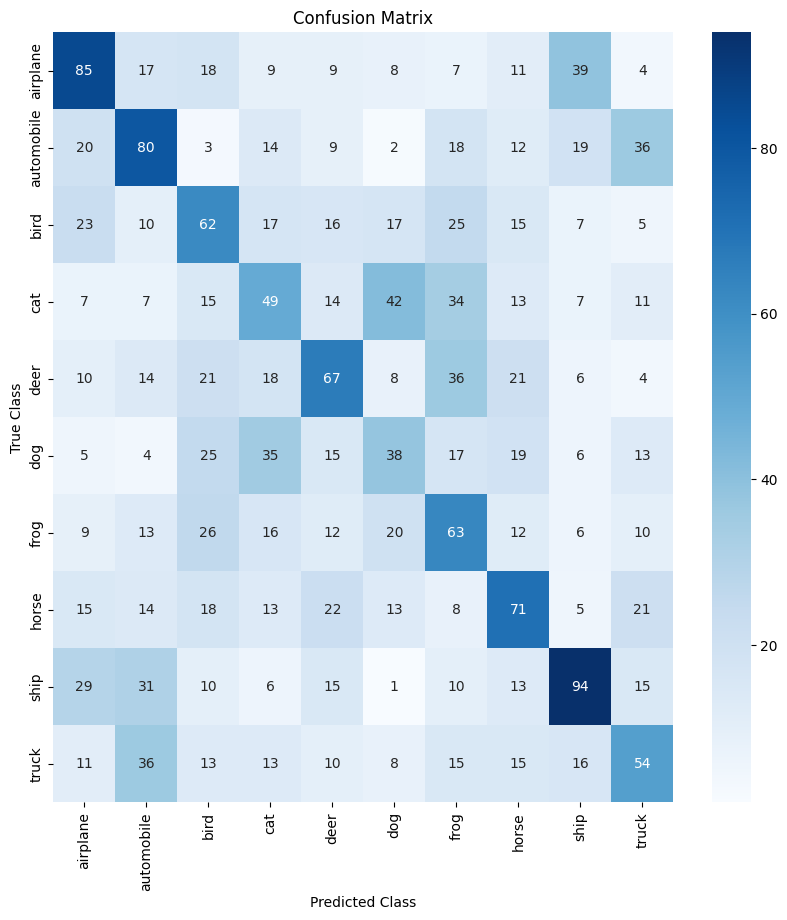

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


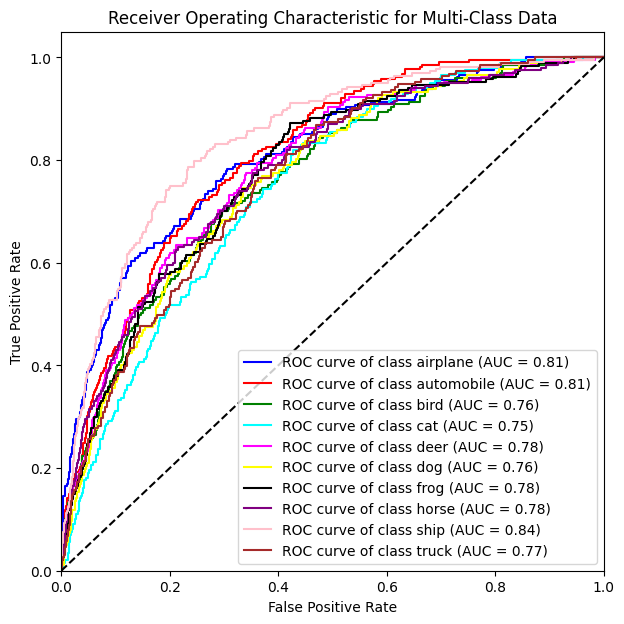

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binariser les labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_bin = model.predict_proba(X_test_hog)

# Initialiser le style du cycle
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown'])

plt.figure(figsize=(7, 7))

for i, color in zip(range(len(class_names)), colors):
    # Calculer la courbe ROC pour la i-ème classe
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])

    # Calculer l'aire sous la courbe ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.plot(fpr, tpr, color=color, label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc:.2f})')

# Tracer la ligne de hasard
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class Data')
plt.legend(loc="lower right")
plt.show()


## SIFT

In [11]:
import cv2
import numpy as np

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    descriptors = []
    
    for img in images:
        img = np.reshape(img, (32, 32, 3))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        _, desc = sift.detectAndCompute(img, None)
        if desc is None:
            desc = np.zeros((1, sift.descriptorSize()))
        descriptors.append(desc.flatten())
        
    return np.array(descriptors)


In [12]:
data_dict = unpickle(DATA_PATH + "data_batch_2")

images = data_dict[b"data"]

sift_features = extract_sift_features(images)

/tmp/ipykernel_19113/545966697.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(descriptors)


In [13]:
sift_features

array([array([0., 0., 0., ..., 0., 0., 6.], dtype=float32),
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
       array([ 47.,  11.,   6.,   9.,   4.,  33.,  62.,  14.,  91.,  14.,   0.,
                0.,  30., 104.,  49.,  31.,  51.,   6.,   0.,   0.,   6.,  54.,
              120., 120.,   5.,   0.,   0.,   0.,   8.,  85., 104.,  61.,   9.,
                0.,   0.,   1.,  31., 114., 120.,  18., 120.,  15.,   0.,   1.,
                8.,  36.,  79.,  66., 120.,  70.,   3.,   4.,  11.,  39.,  84.,
              120.,   4.,   8.,  10.,  57.,  67.,  90.,  61.,   8.,   0.,   0.,
               18.,  74.,  42.,  47.,  77.,   2.,  50.,   3.,   8.,  40.,  27.,
               31.,  29.,  47., 120.,  34.,   1.,   4.,  11.,   2.,   1.,  78.,
                7.,   5.,   4.,  41.,  82.,   2.,   0.,   2.,   0.,   0.,   5.,
               23.,  30.,   3.,   0.,   0.,   5.,   0.,   3.,   6.,   0.,   0.,
                0.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,


In [14]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Entraînez un KMeans sur tous les descripteurs SIFT extraits
n_clusters = 100
all_descriptors = [desc for desc_list in sift_features for desc in desc_list]
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(all_descriptors)

# 2. Représentez chaque image par la fréquence des "mots visuels"
X = [np.bincount(kmeans.predict(desc_list), minlength=n_clusters) for desc_list in sift_features]

# Normalisez les caractéristiques pour avoir une variance unitaire
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Créez un SVM avec un noyau RBF
svm = SVC(kernel='rbf', random_state=42)

# Entraînez le classificateur sur l'ensemble d'entraînement
svm.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calculez la précision du classificateur
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy: {accuracy}')


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
orb = cv2.ORB_create()
orb_features = []
for img in images:
    _, descriptors = orb.detectAndCompute(img, None)
    orb_features.append(descriptors)


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4065: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'
